In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')
%matplotlib inline


Import Data

In [2]:
train_set = pd.read_csv('./input/train.csv')
test_set = pd.read_csv('./input/test.csv')
train_set.info()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:

train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Check the Embarked feature

In [4]:
train_set['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
train_set['Embarked'][train_set.Embarked.isna()].fillna('S', inplace=True)


In [6]:
train_set['Embarked'].value_counts()
train_set['Embarked'] = train_set['Embarked'].fillna('S')

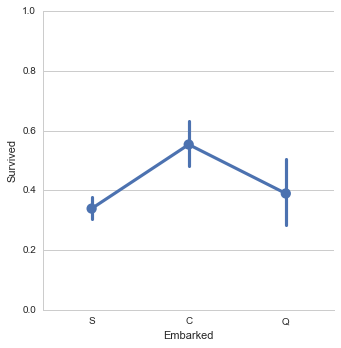

In [7]:
sns.set(style="whitegrid")
h = sns.PairGrid(data=train_set, x_vars=['Embarked'], y_vars='Survived', size=5)
h.map(sns.pointplot)
h.set(ylim=(0, 1))



In [8]:
train_set['Age'] = train_set['Age'].interpolate()
train_set['Age'].describe()


count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

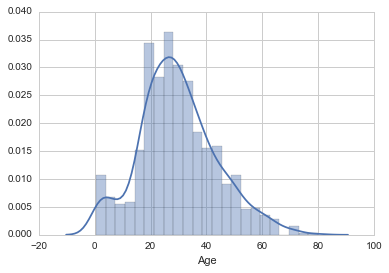

In [9]:
sns.distplot(train_set['Age'])


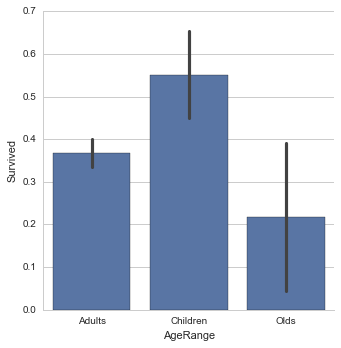

In [10]:
train_set['AgeRange'] = train_set['Age'].apply(
    lambda x: 'Children' if x <= 15 else ('Adults' if x <= 60 else 'Olds'))
a = sns.PairGrid(data=train_set, x_vars=['AgeRange'], y_vars='Survived', size=5)
a.map(sns.barplot)


'Sex' Feature is very important

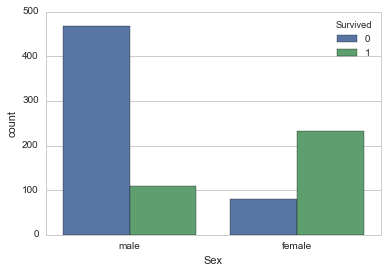

In [11]:
sns.countplot(data=train_set, x='Sex', hue='Survived')
# i = sns.PairGrid(data=train_set, x_vars=['Sex'], y_vars='Survived', size=5)
# i.map(sns.pointplot)

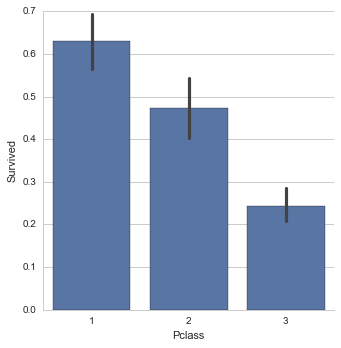

In [12]:
sns.set(style='whitegrid')
g = sns.PairGrid(data=train_set, x_vars=['Pclass'], y_vars=['Survived'], size=5)
g.map(sns.barplot)


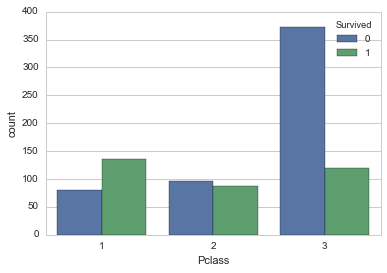

In [13]:
sns.countplot(data=train_set, x='Pclass', hue='Survived')


In [14]:
train_set['family'] = train_set['SibSp'] + train_set['Parch']
train_set = train_set.drop(['SibSp', 'Parch'], axis=1)


In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
AgeRange       891 non-null object
family         891 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [16]:
train_set = train_set.drop(['Name', 'Ticket',  'PassengerId', 'Age', 'Fare', 'Cabin', ], axis=1)
train_set.head()


In [17]:
# X = train_set.drop(['Survived'], axis=1)
# y = train_set['Survived']
X = train_set.iloc[:, 1:].values
y = train_set.iloc[:, 0].values
accuracies = []

In [18]:
label_encoder_Sex = LabelEncoder()
label_encoder_Embarked = LabelEncoder()
label_encoder_AgeRange = LabelEncoder()
X[:, 1] = label_encoder_Sex.fit_transform(X[:, 1])
X[:, 2] = label_encoder_Embarked.fit_transform(X[:, 2])
X[:, 3] = label_encoder_AgeRange.fit_transform(X[:, 3])

In [19]:
# Split the dataset into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Logistic Regression


In [20]:

classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
lr_score = classifier.score(X_test, y_test)
accuracies.append(lr_score)
print(lr_score)


0.776536312849162


SVM


In [22]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


0.776536312849162


In [23]:

svm_score = svm.score(X_test, y_test)
accuracies.append(svm_score)
print(svm_score)

0.776536312849162


Kernel SVM

In [24]:
k_svm = SVC(kernel='rbf')
k_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
k_svm_score = k_svm.score(X_test, y_test)
accuracies.append(k_svm_score)
print(k_svm_score)

0.8156424581005587


K Nearest Neighbers KNN

In [26]:
knn = KNeighborsClassifier(p=2, n_neighbors=10)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [27]:
knn_score = knn.score(X_test, y_test)
accuracies.append(knn_score)
print(knn_score)

0.7486033519553073


Random Forest 

In [28]:
rand_forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
rand_forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rand_forest_score = rand_forest.score(X_test, y_test)
accuracies.append(rand_forest_score)
print(rand_forest_score)

0.8100558659217877


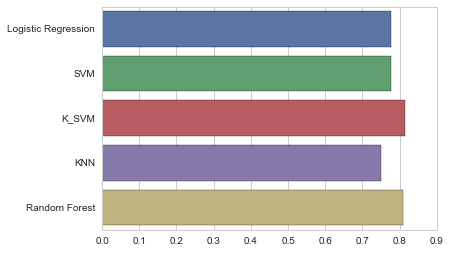

In [30]:
mLabels = ['Logistic Regression', 'SVM', 'K_SVM', 'KNN', 'Random Forest']
sns.barplot(x=accuracies, y=mLabels)